# Project: EDA of Credit Card Transactions for Fraud Detection 

### Problem Statement: 
Credit card fraud is a significant concern for financial institutions and consumers. Fraudulent activities cause substantial losses and impact customer trust. This project aims to perform Exploratory Data Analysis (EDA) on credit card transaction data to identify patterns and anomalies that may indicate fraudulent behavior.  

Students will analyze the dataset to gain insights into transaction patterns and potential factors distinguishing fraudulent transactions from legitimate ones. 

#### Dataset Details:   

Dataset Name: Credit Card Fraud Detection Datase  
 
Source: Kaggle -https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
credit_card_df = pd.read_csv('C:/Users/DELL/Desktop/Data World/Project 1_EDA/creditcard.csv')

In [5]:
credit_card_df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
231415,146752.0,2.027397,0.261264,-3.623873,0.453135,3.251257,3.055838,0.078940,0.665816,-0.013652,...,-0.044729,0.006675,0.013470,0.578303,0.514496,-0.470280,0.020981,-0.036335,1.00,0
263961,161200.0,-0.515779,-0.425097,0.629603,-1.859810,-0.514629,2.388652,-0.812647,0.965168,-0.449460,...,-0.029441,0.609532,0.325382,-0.958932,-0.980087,0.594192,-0.019707,-0.263230,119.85,0
36878,38719.0,-1.241178,0.913341,1.544858,1.630340,-1.100153,1.008904,-1.005584,1.458316,0.374095,...,-0.180812,-0.477699,0.077255,-0.030440,-0.472670,-0.455702,-0.152695,-0.005772,5.45,0
59754,48986.0,-1.721290,0.955904,0.151297,-1.432599,-0.594182,-0.712523,0.714242,0.359158,0.473086,...,-0.085722,-0.255919,0.026442,-0.086896,-0.295664,0.575200,-0.815564,-0.287050,93.75,0
72223,54619.0,1.188722,0.089637,-0.683784,1.574791,2.132328,4.137730,-0.654264,1.000483,-0.304733,...,-0.147332,-0.413964,-0.104574,1.012122,0.744068,0.064788,0.010875,0.016681,15.17,0


## Exploratory Data Analysis

**1. How many rows and columns are in the dataset?**

In [8]:
credit_card_df.shape

(284807, 31)

There are **284807** rows and **31** columns in the dataset.

**2. What are the column names and their data types?**

In [11]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**3. Are there any missing or null values in the dataset?**

In [13]:
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No, there are not any missing or null value in the dataset.

**4. How many transactions are fraudulent, and how many are legitimate?**

In [16]:
credit_card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Out of **284807** transactions, **492** transactions are fraudulent and **284315** transactions are legitimate.

**5. What percentage of transactions are fraudulent?**

In [19]:
fraudulent_transactions = credit_card_df['Class'].value_counts()[1]
total_transactions = credit_card_df.shape[0]

round(fraudulent_transactions / total_transactions * 100 , 2)

0.17

**0.17%** of transactions out of **284315** are fraudulent.

**6. What are the minimum, maximum, mean, and median values for numerical columns like Amount?**

In [22]:
credit_card_df['Amount'].min()

0.0

The minimum value for Amount is **0.0**

In [24]:
credit_card_df['Amount'].max()

25691.16

The maximum value for Amount is **25691.16**

In [26]:
round(credit_card_df['Amount'].mean(), 2)

88.35

The mean value for Amount is **88.35**

In [28]:
credit_card_df['Amount'].median()

22.0

The median value for Amount is **22.0**

**7. What is the maximum transaction amount in the dataset, and is it fraudulent?**

In [31]:
max_trans_amount = credit_card_df['Amount'].max()
credit_card_df[['Amount', 'Class']][credit_card_df['Amount'] == max_trans_amount]

,Amount,Class
274771,25691.16,0


The maximum transaction amount is **25691.16** and it is a **non-fraudulent** transaction.

**8. Can we create a bar chart showing the count of fraudulent vs. legitimate transactions?**

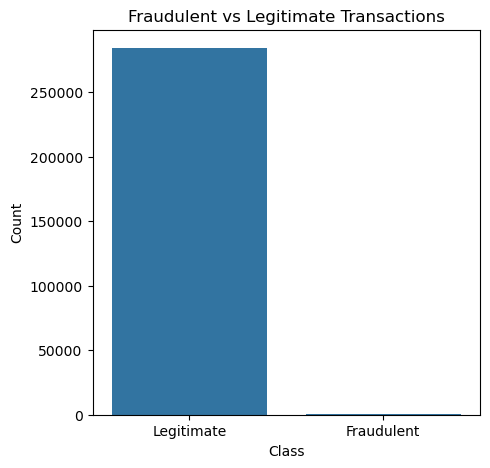

In [34]:
data = credit_card_df['Class'].replace({0: 'Legitimate', 1: 'Fraudulent'})

plt.figure(figsize=(5,5))
sns.countplot(x=data)
plt.title("Fraudulent vs Legitimate Transactions")
plt.ylabel("Count")
plt.show()

**9. What does the histogram of transaction amounts look like?**

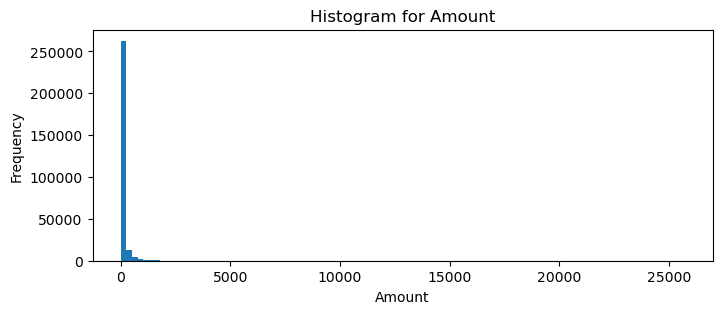

In [36]:
amount = credit_card_df['Amount']

plt.figure(figsize=(8,3))
plt.hist(x=amount, bins=100)
plt.title("Histogram for Amount")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**10. Can we use a heatmap to visualize the correlation between numerical features?**

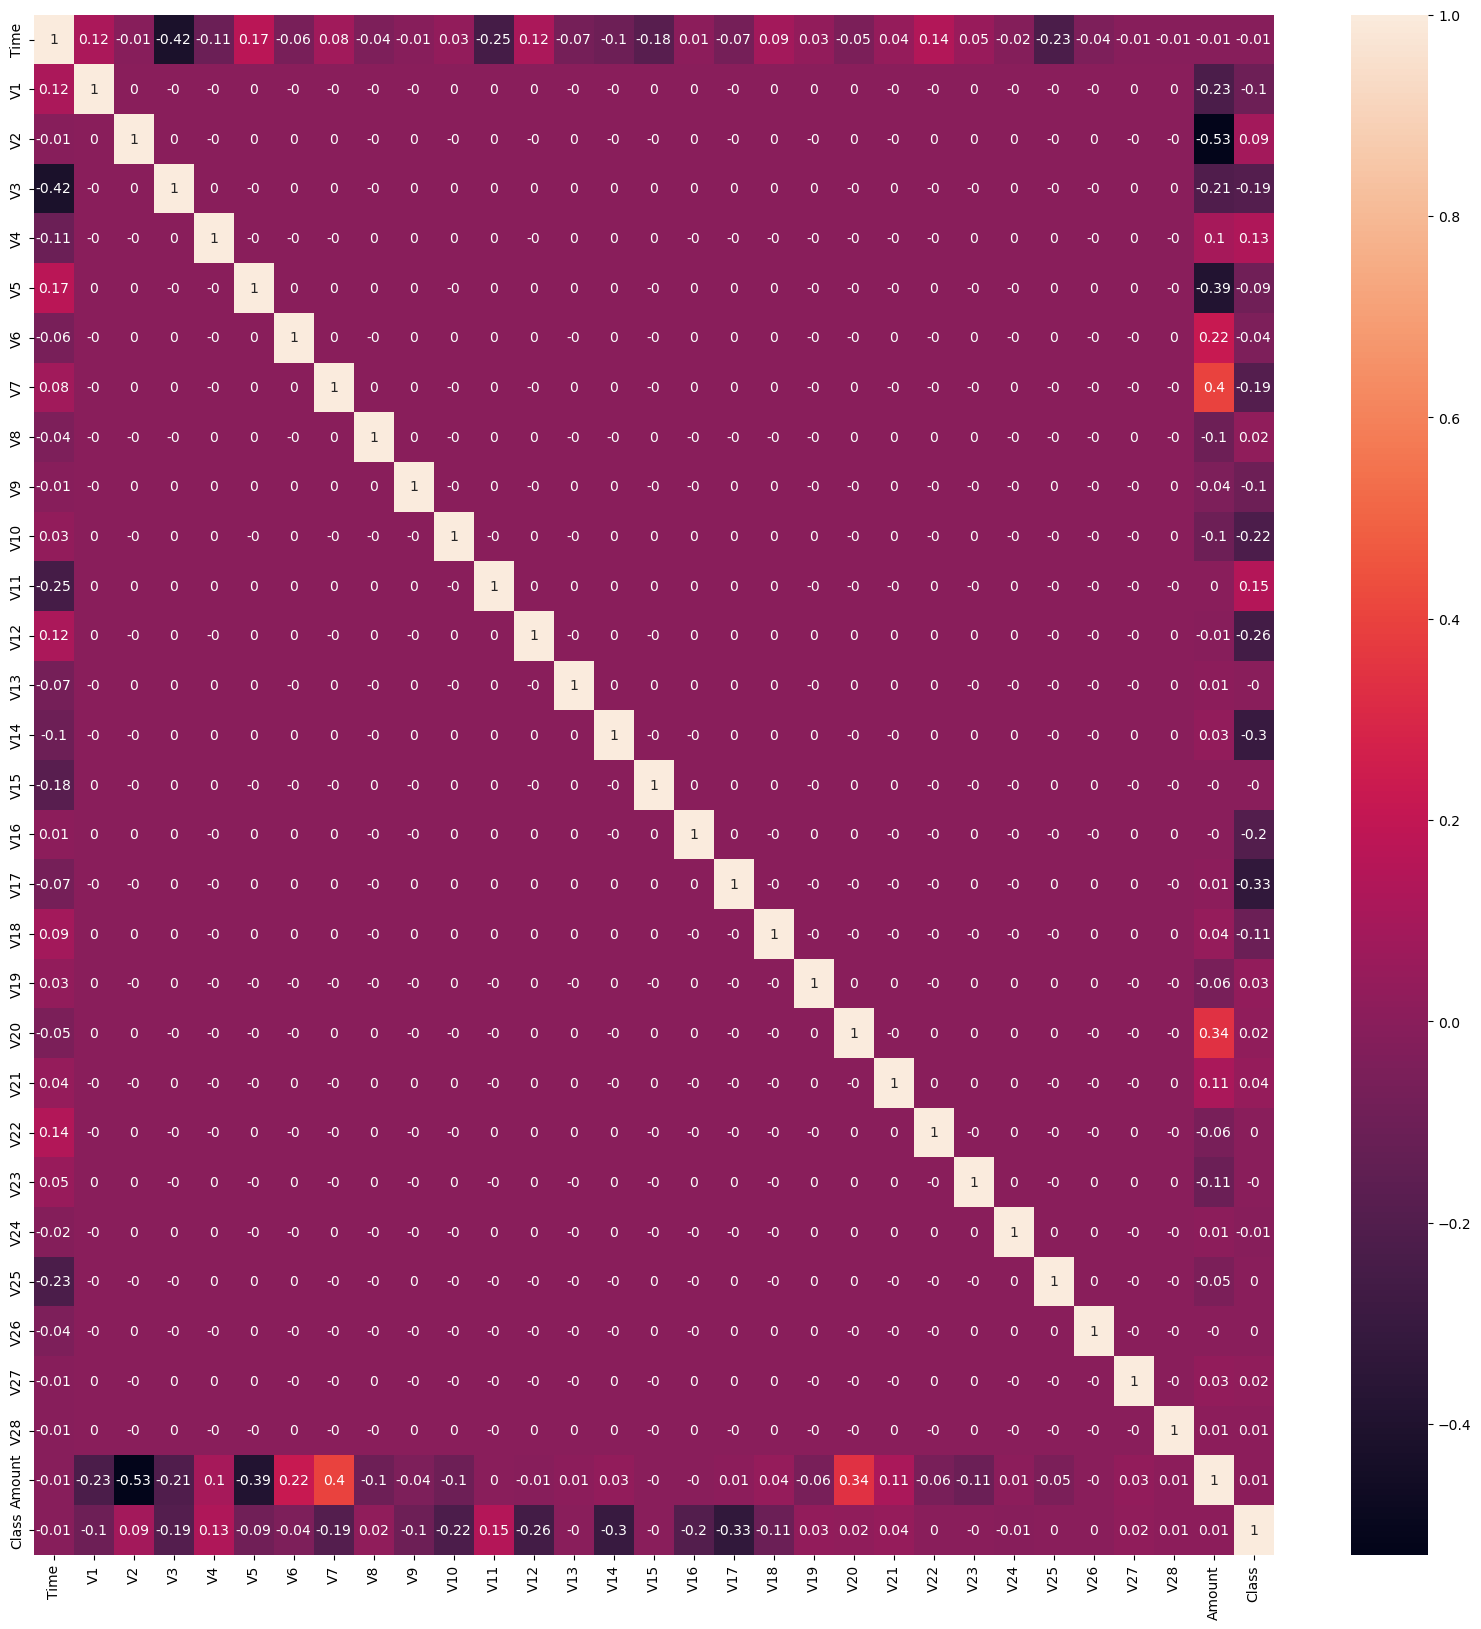

In [38]:
plt.figure(figsize=(20,20))
corr = round(credit_card_df.corr(), 2)
sns.heatmap(data=corr, annot=True)
plt.show()